# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we consider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two random variables, denoting age and weight, respectively.
Consider a random sample of size $n=20$ from these two variables

In [16]:
X = np.array([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
Y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140, 150, 165, 185, 210, 220])

**a)** Find the mean, median and mode for $X$  

In [17]:
def compute_mean(X):
    """
    Input: certain list of data   
    Output: mean of this list   
    Note: There also have an optional to build function prescind from Numpy
    """
    # TODO: the calculation process of mean
    mean = np.mean(X)
    return mean

def compute_median(X):
    # TODO: the calculation process of median
    median = np.median(X)
    return median

def compute_mode(X):
    """ 
    Note: Could also build a counts dictionary for observing elements which may reuse when calculating pmf 
    """
    # TODO: the calculation process of mode  
    mode, count = scipy.stats.mode(X)
    return mode[0]

In [18]:
print(compute_mean(X))
print(compute_median(X))
print(compute_mode(X))

71.45
71.5
74


**b)** What is the variance for $Y$?  

In [36]:
def compute_pmf(X):
    """
    Input: initial X or counts dictionary builded bufore
    Note: Could reuse counts points 
    """
    # TODO: the calculation process of pmf
    counts = np.bincount(X)
    return counts / len(X)

def compute_ev(pmf):
    """
    Input: pmf of X
    """
    # TODO: the calculation process of expected value
    expected = 0
    for i, index in enumerate(pmf):
        expected += i * index
    return expected

def compute_variance(X, ev):  
    """
    Input: pmf and  of expected value of X
    """
    # TODO: the calculation process of variance
    variance = 0
    for i in X:
        variance += (i-ev)**2
    return variance / (len(X)-1)


In [37]:
# TODO
pmf = compute_pmf(X)
print(pmf)
eX = compute_ev(pmf)
print(eX)
print(compute_variance(X,eX))

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.1  0.1  0.05
 0.1  0.05 0.1  0.   0.15 0.1  0.1  0.   0.   0.05]
71.45
14.57631578947369


**c)** Plot the normal distribution for $X$. Consider if the data seems to fit a normal distribution.  

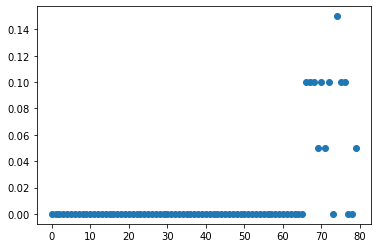

In [41]:
# TODO
fig, ax = plt.subplots()
ax.scatter(range(len(pmf)), pmf)

plt.show()

**d)** What is the probability of observing an age of 80 or higher?  

In [ ]:
# TODO
0

**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [82]:
# TODO
values = np.array([X,Y]).transpose()
means = np.array([compute_mean(X), compute_mean(Y)])
#print(means)
#print(values)
adjusted_for_mean = np.subtract(values, means)
#print(adjusted_for_mean[:,0].reshape(20,1))
#print(adjusted_for_mean[:,1])
covariance_matrix = adjusted_for_mean.T @ adjusted_for_mean
print(covariance_matrix / (len(X)-1))
#SOMETHING GOES WRONG I DON'T GET IT
print(np.cov(X,Y))

[[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]
[[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]


**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

In [77]:
# TODO
print((X-np.min(X))/(np.max(X)-np.min(X)))

[0.23076923 0.61538462 0.15384615 0.30769231 0.46153846 0.07692308
 0.         0.30769231 0.76923077 0.15384615 0.46153846 1.
 0.61538462 0.07692308 0.         0.38461538 0.61538462 0.69230769
 0.69230769 0.76923077]


**g)** Normalize the data with _standard score normalization_, such that is has mean 0 and standard deviation 1.  

In [78]:
# TODO
print((X-np.mean(X))/(np.var(X)))

[-0.17692724  0.18414876 -0.24914244 -0.10471204  0.03971836 -0.32135765
 -0.39357285 -0.10471204  0.32857917 -0.24914244  0.03971836  0.54522477
  0.18414876 -0.32135765 -0.39357285 -0.03249684  0.18414876  0.25636396
  0.25636396  0.32857917]


## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers
 - Median is robust against outliers
 - Standard deviation is robust against outliers

 - FALSE
 - TRUE
 - FALSE

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

We say that a statistic is robust if it is not affected by extreme values (such
as outliers) in the data.

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 

You test whether two variables are independent using a hypothesis test (Xi-squared)

They are independent if the following hold for their pmf
p_12 = p_1 * p_2

See p. 78 data-mining-and-machine-learning

## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.5](graphics/3.5.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes . Include the marginal counts.  
**b)** Compute the $\chi^2$ statistic between them.  
**c)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.11](graphics/3.11.png)

In [ ]:
stats.chi2_contingency()
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances? 
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$? 

1. we can use triangle equality
2. Yes, we need to compute for example $d(p_1,p_4)$ since we can't use triangle inequality directly before.
3. Yes, $d(p_2,p_4)\in[1,3]$ and $d(p_2,p_4)\in[0,4]$

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

If there is an outlier it will have a larger effect on x_i than on the mean, therefore it is not robust.

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. If we know that the correlation between $X$
and $Y$ is zero, what can you infer about the values of $Y$? (Find a relationship between a, b and c)

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|
|$1$|$b$|

# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](graphics/3.9.png)

In [86]:
xy = np.array([[40,25],[40,35]])
scipy.stats.chi2_contingency(xy)

(0.6515384615384604,
 0.4195631759021463,
 1,
 array([[37.14285714, 27.85714286],
        [42.85714286, 32.14285714]]))

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.
**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.5](graphics/3.5.png)



In [88]:
X = np.array([[0.3, 0],[-0.3,1],[0.44,0],[-0.6,0],[0.4,0],[1.2,1],[-0.12,0],[-1.6,1],[1.6,1],[-1.32,0]])
print(np.mean(X))
print(np.cov(X.T))

0.2
[[1.02337778 0.1       ]
 [0.1        0.26666667]]
